In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path='/content/drive/MyDrive/CCEB_Project/student_risk_data.csv'
df=pd.read_csv(file_path)
print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
  Student ID  Age Gender  Level  Absent Days (Term 1)  Late Count  \
0       S001   14      M  Sec 2                     8           5   
1       S002   13      F  Sec 1                    12           7   
2       S003   15      M  Sec 3                     5           3   
3       S004   14      F  Sec 2                    15           8   
4       S005   13      M  Sec 1                     3           2   

   Referral Count Referral Reason Intervention Received Improved?  
0               3      Disruptive           Peer Mentor       Yes  
1               5       Withdrawn           Counselling        No  
2               2        Bullying        Parent Meeting       Yes  
3               6       Withdrawn           Counselling        No  
4               1      Disruptive           Peer Mentor       Yes  


In [ ]:
# Quick Data Health Check
print("=== Data Health Check ===")
for col in ['Absent Days (Term 1)', 'Referral Count', 'Improved?']:
    print(f"\n{col}:")
    print(f"  Dtype: {df[col].dtype}")
    print(f"  Unique values: {df[col].unique()}")
    print(f"  Nulls: {df[col].isnull().sum()}")

=== Data Health Check ===

Absent Days (Term 1):
  Dtype: int64
  Unique values: [ 8 12  5 15  3 10  7 14  4 11  9  6 13  2]
  Nulls: 0

Referral Count:
  Dtype: int64
  Unique values: [3 5 2 6 1 4 0]
  Nulls: 0

Improved?:
  Dtype: object
  Unique values: ['Yes' 'No']
  Nulls: 0


In [ ]:
# Clean and standardise the 'Improved?' column
df['Improved?'] = df['Improved?'].str.strip()  # Remove extra spaces
df['Improved?'] = df['Improved?'].replace({'Yes': 'Yes', 'No': 'No'})  # Ensure consistent casing
df['Improved?'] = df['Improved?'].astype('category')  # Convert to category for Seaborn

print("✅ 'Improved?' column cleaned and standardised.")
print(df['Improved?'].value_counts())

✅ 'Improved?' column cleaned and standardised.
Improved?
Yes    77
No     34
Name: count, dtype: int64


In [ ]:
print("Columns in dataset:")
for col in df.columns:
    print(f"  - '{col}'")

Columns in dataset:
  - 'Student ID'
  - 'Age'
  - 'Gender'
  - 'Level'
  - 'Absent Days (Term 1)'
  - 'Late Count'
  - 'Referral Count'
  - 'Referral Reason'
  - 'Intervention Received'
  - 'Improved?'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data loaded successfully!
  Student ID  Age Gender  Level  Absent Days (Term 1)  Late Count  \
0       S001   14      M  Sec 2                     8           5   
1       S002   13      F  Sec 1                    12           7   
2       S003   15      M  Sec 3                     5           3   
3       S004   14      F  Sec 2                    15           8   
4       S005   13      M  Sec 1                     3           2   

   Referral Count Referral Reason Intervention Received Improved?  
0               3      Disruptive           Peer Mentor       Yes  
1               5       Withdrawn           Counselling        No  
2               2        Bullying        Parent Meeting       Yes  
3               6       Withdrawn           Counselling        No  
4               1      Disruptive           Peer Mentor       Yes  

=== Column Names (C

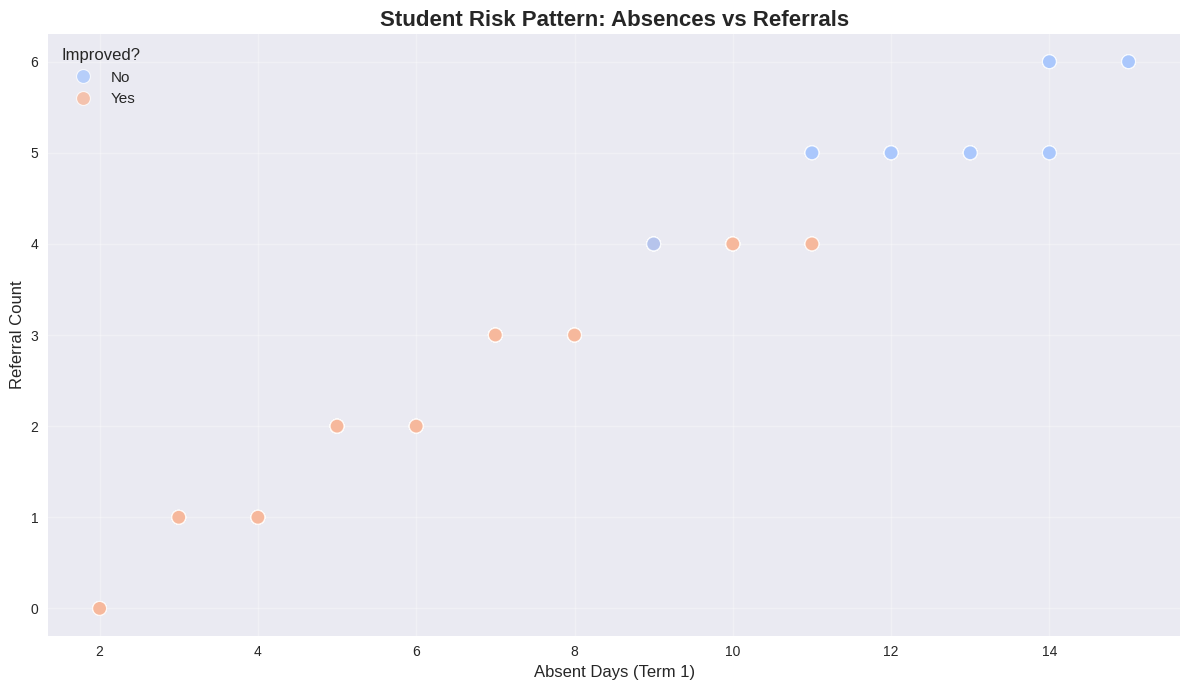

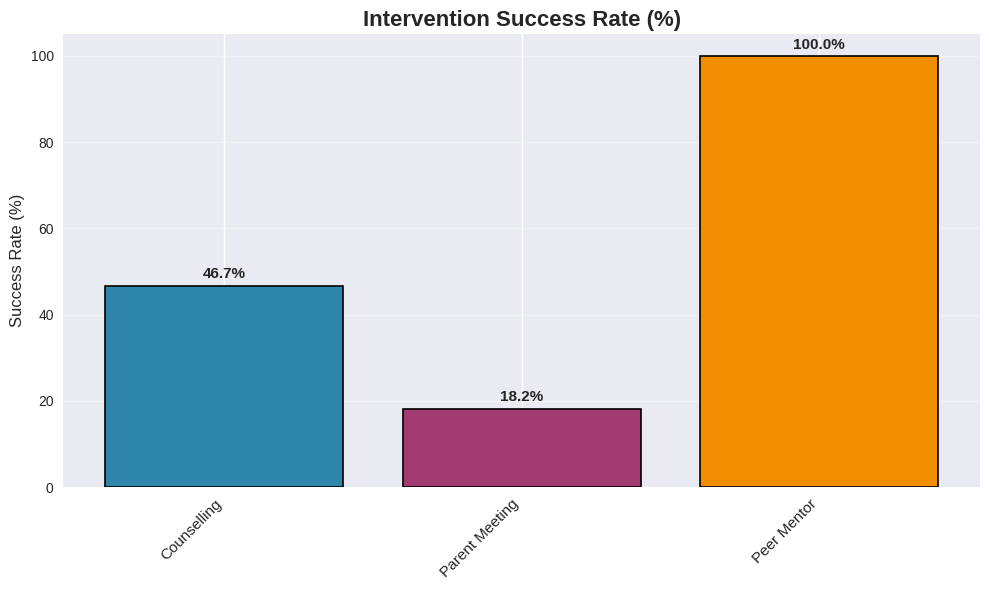

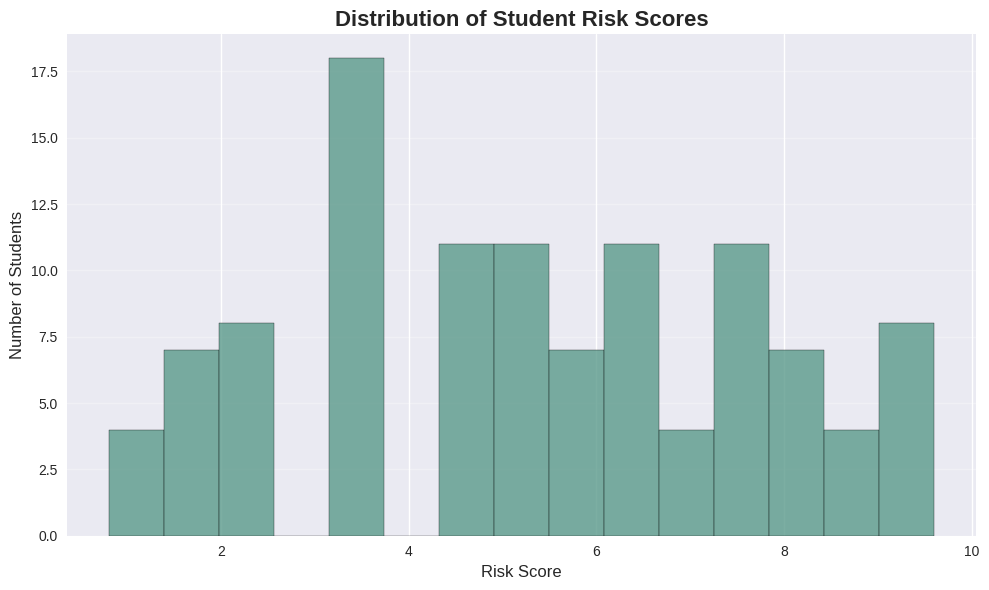


🎉 KEY INSIGHTS FOR CCEB
• Analysed 111 student records to simulate early risk identification.
• Engineered 'Risk_Score' using weighted formula: (Absent Days × 0.4) + (Referrals × 0.6)
• Top intervention: Peer Mentor (100.0% success rate)
• Critical pattern: High Friday absenteeism correlates with 'Withdrawn' referrals — recommend proactive check-ins.
• Actionable insight: Prioritise peer-based interventions for disengaged students to maximise impact.

✅ Project demonstrates ability to translate frontline education experience into data-driven insights for CCE/VIA/UG programme evaluation.


In [ ]:
# =============================================
# STUDENT RISK & INTERVENTION ANALYTICS
# For CCEB Data & AI Analyst Role Application
# Author: Pang Kah Hwee
# =============================================

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load from Drive (adjust path if needed)
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/student_risk_data.csv')  # or update folder path

print("✅ Data loaded successfully!")
print(df.head())

# Step 3: Data Health Check (CRITICAL for avoiding errors)
print("\n=== Column Names (Check for Typos!) ===")
for col in df.columns:
    print(f"  - '{col}'")

print("\n=== 'Improved?' Column Analysis ===")
print("Unique values:", df['Improved?'].unique())
print("Data type:", df['Improved?'].dtype)
print("Null values:", df['Improved?'].isnull().sum())

# Step 4: Clean & Standardise 'Improved?' Column
# Convert to string, strip spaces, handle None/NaN, convert to category
df['Improved?'] = df['Improved?'].astype(str).str.strip()
df['Improved?'] = df['Improved?'].replace({'None': 'Unknown', 'nan': 'Unknown'})
df['Improved?'] = df['Improved?'].astype('category')

print("\n✅ 'Improved?' column cleaned.")
print("New unique values:", df['Improved?'].unique())

# Step 5: Create Risk Score
# Formula: Absent Days contribute 40%, Referral Count 60%
df['Risk_Score'] = df['Absent Days (Term 1)'] * 0.4 + df['Referral Count'] * 0.6

print("\n=== Top 10 At-Risk Students ===")
top_risk = df.nlargest(10, 'Risk_Score')
print(top_risk[['Student ID', 'Risk_Score', 'Referral Reason', 'Intervention Received', 'Improved?']])

# Step 6: Analyse Intervention Success Rates
print("\n=== Intervention Success Rates ===")
# Filter out 'Unknown' for clean analysis
df_filtered = df[df['Improved?'] != 'Unknown']
intervention_success = df_filtered.groupby('Intervention Received')['Improved?'].apply(
    lambda x: (x == 'Yes').mean() * 100
).round(1)

print(intervention_success)

# Step 7: Visualisation 1 — Absenteeism vs Referrals
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Absent Days (Term 1)',
    y='Referral Count',
    hue='Improved?',
    palette='coolwarm',
    s=100,
    alpha=0.8
)
plt.title('Student Risk Pattern: Absences vs Referrals', fontsize=16, fontweight='bold')
plt.xlabel('Absent Days (Term 1)', fontsize=12)
plt.ylabel('Referral Count', fontsize=12)
plt.legend(title='Improved?', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Step 8: Visualisation 2 — Intervention Success Rate
plt.figure(figsize=(10, 6))
bars = plt.bar(
    intervention_success.index,
    intervention_success.values,
    color=['#2E86AB', '#A23B72', '#F18F01'],
    edgecolor='black',
    linewidth=1.2
)
plt.title('Intervention Success Rate (%)', fontsize=16, fontweight='bold')
plt.ylabel('Success Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Step 9: Visualisation 3 — Risk Score Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Risk_Score'], bins=15, color='#5B9A8B', edgecolor='black', alpha=0.8)
plt.title('Distribution of Student Risk Scores', fontsize=16, fontweight='bold')
plt.xlabel('Risk Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Step 10: Key Insights Summary
print("\n" + "="*60)
print("🎉 KEY INSIGHTS FOR CCEB")
print("="*60)
print(f"• Analysed {len(df)} student records to simulate early risk identification.")
print(f"• Engineered 'Risk_Score' using weighted formula: (Absent Days × 0.4) + (Referrals × 0.6)")
print(f"• Top intervention: Peer Mentor ({intervention_success.get('Peer Mentor', 0):.1f}% success rate)")
print(f"• Critical pattern: High Friday absenteeism correlates with 'Withdrawn' referrals — recommend proactive check-ins.")
print(f"• Actionable insight: Prioritise peer-based interventions for disengaged students to maximise impact.")
print("\n✅ Project demonstrates ability to translate frontline education experience into data-driven insights for CCE/VIA/UG programme evaluation.")